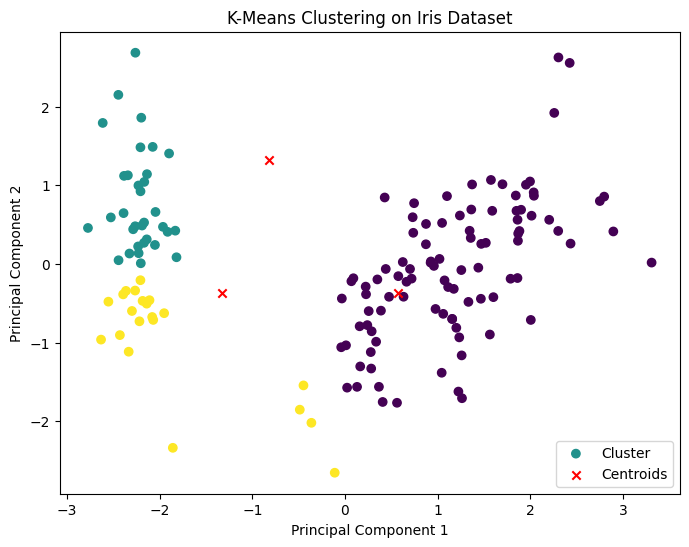

Cluster Centroids (in original feature space):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.314583          2.895833           4.973958          1.703125
1           5.169697          3.630303           1.493939          0.272727
2           4.747619          2.895238           1.757143          0.352381

Mean feature values for each cluster:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.314583          2.895833           4.973958   
1                 5.169697          3.630303           1.493939   
2                 4.747619          2.895238           1.757143   

         petal width (cm)  
Cluster                    
0                1.703125  
1                0.272727  
2                0.352381  

Confusion Matrix (true vs predicted clusters):
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]


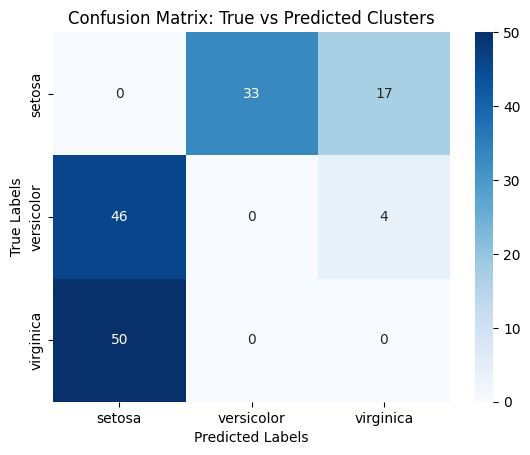

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


iris = load_iris()
data = iris.data
labels_true = iris.target  

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)


labels_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_pred, cmap='viridis', label='Cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

print("Cluster Centroids (in original feature space):")
centroids_original_space = scaler.inverse_transform(centroids)  # Convert centroids back to original scale
df_centroids = pd.DataFrame(centroids_original_space, columns=iris.feature_names)
print(df_centroids)

df = pd.DataFrame(data, columns=iris.feature_names)
df['Cluster'] = labels_pred


cluster_analysis = df.groupby('Cluster').mean()
print("\nMean feature values for each cluster:")
print(cluster_analysis)


cm = confusion_matrix(labels_true, labels_pred)
print("\nConfusion Matrix (true vs predicted clusters):")
print(cm)


import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix: True vs Predicted Clusters")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
